In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/tuyenhavan/Statistics/Dataset/World_Life_Expectancy.csv', sep=";", encoding='cp1252')

In [24]:
df.head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 15,2014,2015
0,Afghanistan,55.1,55.5,55.9,56.2,56.6,57.0,57.4,57.8,58.2,58.6,59.0,59.3,59.7,60.0,NaN,60.4,60.7
1,Albania,74.3,74.7,75.2,75.5,75.8,76.1,76.3,76.5,76.7,76.8,77.0,77.2,77.4,77.6,NaN,77.8,78.0
2,Algeria,70.2,70.6,71.0,71.4,71.8,72.2,72.6,72.9,73.2,73.5,73.8,74.1,74.3,74.6,NaN,74.8,75.0
3,American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN,..,..
4,Andorra,..,..,..,..,..,..,..,..,..,..,..,..,..,..,NaN,..,..


In [25]:
# sep by tab and lineterminator by \n
df2 = pd.read_csv('nationalincome.csv',sep='\t', lineterminator='\n', encoding='cp1252')

In [26]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019\r
0,Aruba,ABW,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,19741.149800,19960.521210,21038.151120,20841.489470,21891.503900,21961.098810,21368.804890,21385.451660,NaN,\r
1,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,477.307009,517.448448,554.779216,550.956701,529.876402,502.276410,465.841583,466.079081,NaN,\r
2,Angola,AGO,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1108.338717,1494.240377,1789.733615,2113.866121,2498.701951,2341.460543,1949.114680,2148.272969,NaN,\r
3,Albania,ALB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3530.690656,3853.165353,3644.843103,3937.277061,4038.014865,3560.787907,3776.111694,4105.150515,NaN,\r
4,Andorra,AND,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r


In [27]:
df2['Country Name']

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
259          Kosovo
260     Yemen, Rep.
261    South Africa
262          Zambia
263        Zimbabwe
Name: Country Name, Length: 264, dtype: object

In [28]:
# select my country
df3 = df2.loc[df2['Country Name'] == 'Bangladesh']
df3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019\r
18,Bangladesh,BGD,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,771.853782,845.018937,872.40315,964.941813,1081.974743,1212.708886,1352.190196,1483.833911,NaN,\r


In [29]:
# drop useless columns
df4 = df3.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2019\r'], axis= 1)
df4

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,693.202657,771.853782,845.018937,872.40315,964.941813,1081.974743,1212.708886,1352.190196,1483.833911,NaN


In [30]:
#check is nan
# df4.isna()

In [31]:
# drop nan columns
df4 = df4.dropna(axis='columns')
df4

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
18,110.224048,168.42806,254.617385,128.994967,117.643637,158.87012,183.164331,208.487411,231.137134,205.553544,...,622.976599,693.202657,771.853782,845.018937,872.40315,964.941813,1081.974743,1212.708886,1352.190196,1483.833911


In [32]:
list(df4.columns)

['1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [33]:
# select row 
list(df4.iloc[0])

[110.224048,
 168.42806000000002,
 254.61738509999998,
 128.994967,
 117.6436375,
 158.87011950000002,
 183.1643305,
 208.4874111,
 231.1371337,
 205.5535437,
 193.22353619999998,
 202.5326226,
 230.0351392,
 219.2734043,
 239.24010479999998,
 254.43792779999998,
 268.71515750000003,
 287.01247939999996,
 275.1154841,
 276.0492787,
 283.6599483,
 283.7768222,
 311.8550229,
 372.04974280000005,
 379.6921463,
 385.3959088,
 388.188334,
 396.83768219999996,
 392.6178842,
 394.4565637,
 426.34121849999997,
 455.85024680000004,
 479.1241574,
 488.7535371999999,
 539.9180822000001,
 622.9765993999999,
 693.202657,
 771.8537819000001,
 845.0189375,
 872.4031499,
 964.9418135,
 1081.974743,
 1212.708886,
 1352.190196,
 1483.833911]

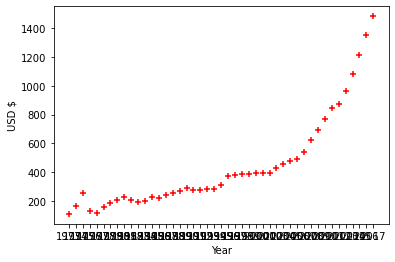

In [34]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('USD $')
plt.scatter(df4.columns, df4.iloc[0], color = 'red', marker='+')

In [35]:
# darray = [x for x in range(1973, 2018)]

# df4.loc[1] = darray
# df4
df5 = df4.transpose()
df5 = df5.rename(columns = {18:'value'})
df5['year'] = [x for x in range(1973, 2018)]
# last ten year
df5 = df5[-10:]

In [36]:
# df4.iloc[1]
reg = linear_model.LinearRegression()
reg.fit(df5[['year']], df5.value)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
reg.predict([[2017]])

array([1409.24619965])

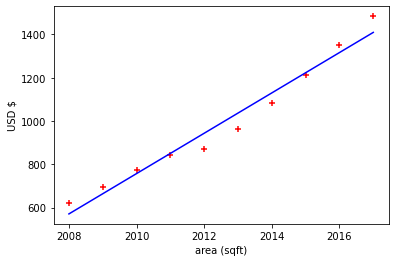

In [38]:
%matplotlib inline
plt.xlabel('area (sqft)')
plt.ylabel('USD $')
plt.scatter(df5.year, df5.value, color = 'red', marker='+')
plt.plot(df5.year, reg.predict(df5[['year']]), color='blue')

In [39]:
# from sklearn.metrics import accuracy_score
# dd = reg.predict([[2017]])
# accuracy_score(df5.value, dd)

ValueError: Found input variables with inconsistent numbers of samples: [10, 1]